In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


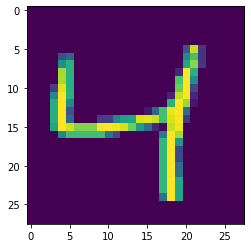

label is  4


In [ ]:
index = 2
img = train_images[index]
plt.imshow(img)
plt.show()
print("label is ", train_labels[index])

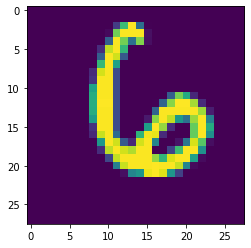

label is  6


In [ ]:
index1 = 88
img = test_images[index1]
plt.imshow(img)
plt.show()
print("label is ", test_labels[index1])

In [ ]:
## shape of data
print(train_images.shape)
print(train_images[0].shape)

(60000, 28, 28)
(28, 28)


In [ ]:
## shape of test data
print(test_images.shape)
print(test_images[0].shape)

(10000, 28, 28)
(28, 28)


In [ ]:
### scaling the images
def scale_images(train_images, test_images):
  train_images = train_images/255.
  test_images = test_images/255.

  return (train_images, test_images)

In [ ]:
scaled_train_images, scaled_test_images = scale_images(train_images, test_images)

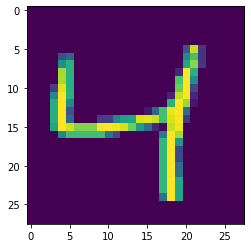

label is  4


In [ ]:
index_2 = 2
img_2 = scaled_train_images[index_2]
plt.imshow(img_2)
plt.show()
print("label is ", train_labels[index_2])

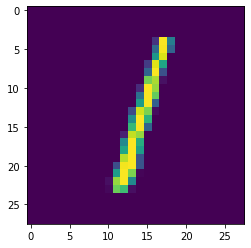

label is  1


In [ ]:
index1_2 = 2
img1_2 = scaled_test_images[index1_2]
plt.imshow(img1_2)
plt.show()
print("label is ", test_labels[index1_2])

In [ ]:
### there is no channel dimension in this
## adding a dummy channel dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [ ]:
### checking shape again
print("scaled_train_images shape is: ", scaled_train_images.shape)
print("shape of one train img is: ", scaled_train_images[0].shape)
print("scaled_test_images shape is: ", scaled_test_images.shape)
print("shape of one test img is: ", scaled_test_images[0].shape)

scaled_train_images shape is:  (60000, 28, 28, 1)
shape of one train img is:  (28, 28, 1)
scaled_test_images shape is:  (10000, 28, 28, 1)
shape of one test img is:  (28, 28, 1)


In [ ]:
### making the model
def mnist_model(input_shape):
  model = Sequential()
  model.add(Conv2D(8, (3,3), padding = 'SAME', activation = 'relu', input_shape = input_shape))   ### 8 filters of (3,3) and same padding
  model.add(MaxPooling2D((2,2)))                                 #### maxpooling layer
  model.add(Flatten())                                           ### flatten layer to unenroll and feed it into a fully connected NN classifier
  model.add(Dense(64, activation = 'relu'))                      ### 64 units with 
  model.add(Dense(64, activation = 'relu'))                      
  model.add(Dense(10, activation = 'softmax'))                   ### 10 units to classify integers between 0 and 10

  return model

In [ ]:
### get the model
model = mnist_model(scaled_train_images[0].shape)                 #### shape here is (28, 28, 1)

In [ ]:
### summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
__________________________________________________

In [ ]:
#### compile the model
def compile_model(model):
  model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
compile_model(model)

In [ ]:
#### train the model
def model_train(model, scaled_train_images, train_labels):
  his = model.fit(scaled_train_images, train_labels, epochs = 5)          ### history to plot accuracy vs epochs and loss vs epochs
  return his

In [ ]:
history = model_train(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2231 - accuracy: 0.9339
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0807 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0321 - accuracy: 0.9896


In [ ]:
df = pd.DataFrame(history.history)
df

,loss,accuracy
0,0.223122,0.933867
1,0.080663,0.974450
2,0.054439,0.983083
3,0.040558,0.987133
4,0.032143,0.989567


[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

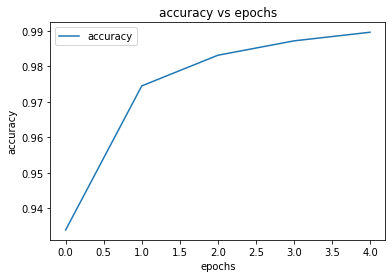

In [ ]:
### accuracy vs epochs
acc_plot = df.plot(y = 'accuracy', title = 'accuracy vs epochs')
acc_plot.set(xlabel = 'epochs', ylabel = 'accuracy')

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epochs')]

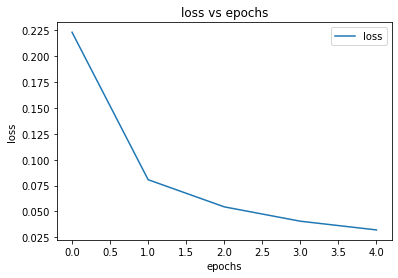

In [ ]:
#### loss vs epochs
acc_plot1 = df.plot(y = 'loss', title = 'loss vs epochs')
acc_plot1.set(xlabel = 'epochs', ylabel = 'loss')

In [ ]:
##### evaluate the model
def model_eval(model, scaled_test_images, test_labels):
  test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=0)
  return (test_loss, test_accuracy)

In [ ]:
test_loss, test_accuracy = model_eval(model, scaled_test_images, test_labels)
print("test_loss is: ", test_loss)
print("test_accuracy is :", test_accuracy)

test_loss is:  0.052392665296792984
test_accuracy is : 0.9846000075340271


label is : 2


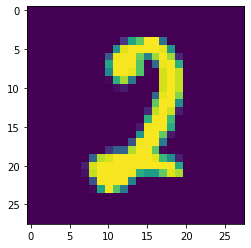

In [ ]:
#### check predictions
### taking random images from test data set
random_idx = np.random.randint(scaled_test_images.shape[0])
random_img = scaled_test_images[random_idx]
random_label = test_labels[random_idx]
print("label is :", random_label)
plt.imshow(np.squeeze(random_img))
plt.show()